<a href="https://colab.research.google.com/github/reinereng/DataScience_Cases/blob/main/Cluster_Teoria_e_Pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Técnicas de Clusterização: Uma Exploração Detalhada**

A clusterização é uma técnica de aprendizado de máquina não supervisionado que agrupa dados baseados em suas semelhanças. Este artigo explora os fundamentos teóricos, técnicas avançadas e implementações em Python de diferentes métodos de clusterização. O objetivo é fornecer uma compreensão aprofundada dessas técnicas para leitores com um entendimento básico de análise de dados.

## **Fundamentos Teóricos da Clusterização**

A clusterização envolve a divisão de um conjunto de dados em grupos, ou "clusters", onde os itens dentro de um grupo são mais semelhantes entre si do que com itens em outros grupos. Esta seção introduzirá definições-chave e a importância da clusterização.

### Definições Chave

- **Cluster:** Um grupo de pontos de dados agrupados devido à semelhança entre eles.
- **Centróide:** O ponto central de um cluster, calculado como a média de todos os pontos no cluster.
- **Distância:** Uma medida de dissimilaridade entre pontos de dados. Exemplos comuns incluem distância euclidiana e distância de Manhattan.

A importância da clusterização reside em sua capacidade de organizar grandes volumes de dados em estruturas significativas, facilitando a análise de dados e a tomada de decisão.

### Alguns tipos de Distância
| Métrica de  Distância  | Características                                           | Equação                                                                      | Aplicações Típicas                                 |
|-----------------------|----------------------------------|------------------------------------|---------------------------------|
| Euclidiana            | Mede a distância "linha reta" <br>entre dois pontos.          | $$\sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$$          | - Reconhecimento de padrões <br> - Machine Learning <br> - Sistemas de recomendação |
| Manhattan             | Soma das diferenças absolutas<br> das coordenadas.            | $$\sum_{i=1}^{n} |p_i - q_i|$$                    | - Planejamento urbano <br> - Compressão de dados <br> - Análise de sequência genética <br> - Análise de tráfego urbano<br>- Processamento de imagens<br>   |
| Minkowski             | Generalização das distâncias<br> Euclidiana e Manhattan.      | $$\bigg(\sum_{i=1}^{n} \big|p_i - q_i\big|^p\bigg)^{\frac{1}{p}}$$  | - Detecção de anomalias <br> - Análise discriminante <br> - Classificação de imagens <br> - Análise de dados variados<br>- Sistemas de recomendação com ajuste de parâmetro `p`<br>- Clusterização com dados heterogêneos|
| Chebyshev             | Maior diferença entre as<br> coordenadas.                     | $$\max_i |p_i - q_i|$$                       | - Jogos de Tabuleiro e Estratégia<br> - Planejamento de Rotas em Malhas <br> - Otimização de Layouts em Manufatura e Logística<br> -  Processamento de Imagens (direção do pixel é relevante)       |
| Cosseno                | Mede a similaridade angular,<br> independente da magnitude.   | $$\frac{\mathbf{p} \cdot \mathbf{q}}{\|\mathbf{p}\| \|\mathbf{q}\|}$$ | - Comparação de documentos<br> - Análise semântica <br> - Detecção de Plágio  |
| Jaccard               | Baseada na interseção sobre a<br> união dos conjuntos de dados. | $$1 - \frac{|\mathbf{p} \cap \mathbf{q}|}{|\mathbf{p} \cup \mathbf{q}|}$$ | - Dados categóricos<br>- Análise de biodiversidade<br>- Análise de cestas de compras    |
| Mahalanobis           | Considera a covariância entre<br> as variáveis.               | $$\sqrt{(\mathbf{p} - \mathbf{q})^T \mathbf{S}^{-1} (\mathbf{p} - \mathbf{q})}$$ | - Dados correlacionados<br>- Detecção de anomalias<br>-  Reconhecimento de Padrões<br>-  Controle de Qualidade     |

## **Técnicas de Clusterização**

### K-means

O K-means é um algoritmo que divide um conjunto de \(N\) pontos de dados em \(K\) clusters, minimizando a variância dentro dos clusters.

#### Vantagens e Desvantagens
- **Vantagens:** Simples e eficiente para grandes volumes de dados.
- **Desvantagens:** Requer a especificação do número de clusters e é sensível a outliers.
- **Aplicação:** Ideal para cenários onde a forma dos clusters é hiperesférica e o número de clusters é conhecido.

### DBSCAN

O DBSCAN agrupa pontos que estão próximos entre si baseado em um limiar de distância e um número mínimo de pontos, permitindo a identificação de clusters de formas arbitrárias.

#### Vantagens e Desvantagens
- **Vantagens:** Não requer a especificação do número de clusters e pode identificar outliers.
- **Desvantagens:** Sensível aos parâmetros de distância e densidade.
- **Aplicação:** Ideal para dados com clusters de densidade variável e para a detecção de outliers.

### Clustering Hierárquico

Agrupa dados construindo uma hierarquia de clusters baseada em distâncias.

#### Vantagens e Desvantagens
- **Vantagens:** O número de clusters não precisa ser especificado antecipadamente.
- **Desvantagens:** Computacionalmente caro para grandes conjuntos de dados.
- **Aplicação:** Útil para visualização e quando a estrutura hierárquica dos dados é importante.

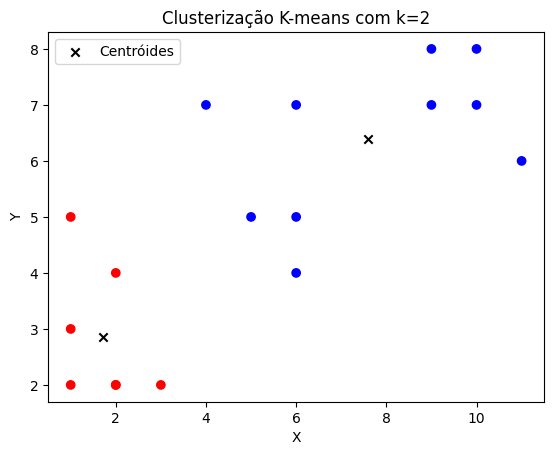

In [23]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Definindo pontos de dados em um espaço bidimensional
P = np.array([
    [1, 2], [1, 5], [2, 2], [2, 4], [1, 3], [2, 2],
    [3, 2], [5, 5], [6, 5], [6, 4], [6, 7], [4, 7],
     [9, 7], [9, 8], [10, 8], [10, 7], [11, 6]
])

# Aplicando K-means com 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0, n_init = 'auto').fit(P)

# Cores para os clusters
colors = ['blue' if label == 0 else 'red' for label in kmeans.labels_]

# Plotando os pontos e os centróides
plt.scatter(P[:, 0], P[:, 1], c=colors, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', label='Centróides')
plt.title('Clusterização K-means com k=2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [20]:
from sklearn.cluster import DBSCAN

# Inicializando e ajustando o modelo DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2).fit(P)

# Predições de cluster
print(dbscan.labels_)

[0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


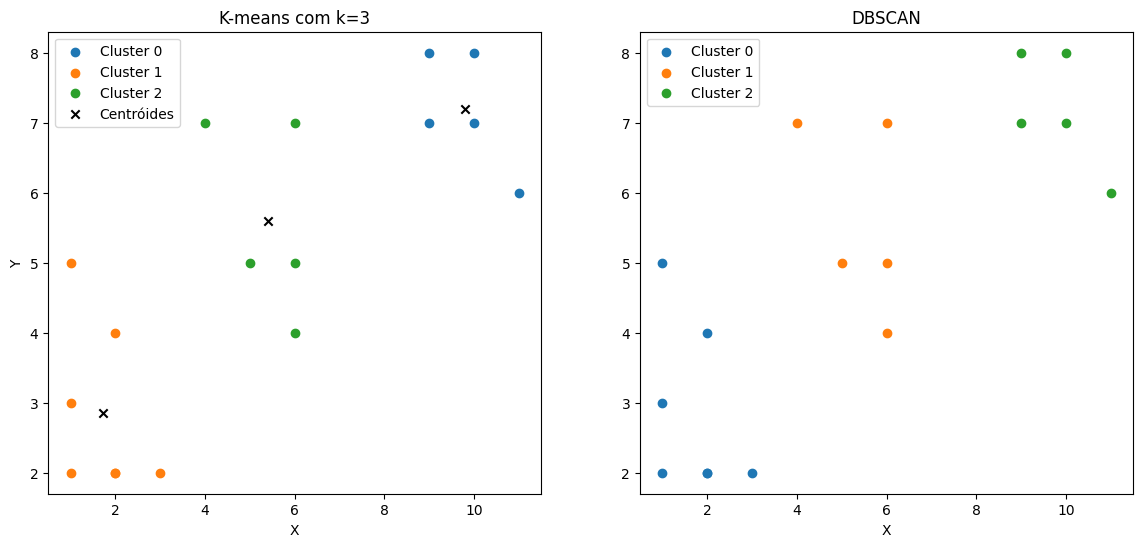

In [26]:
from sklearn.cluster import DBSCAN

# Definindo pontos de dados em um espaço bidimensional
P = np.array([
    [1, 2], [1, 5], [2, 2], [2, 4], [1, 3], [2, 2],
    [3, 2], [5, 5], [6, 5], [6, 4], [6, 7], [4, 7],
    [9, 7], [9, 8], [10, 8], [10, 7], [11, 6]
])

# Aplicando K-means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(P)

# Aplicando DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2).fit(P)

# Configurando a figura e os eixos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotando K-means
for i in range(3):
    points = P[kmeans.labels_ == i]
    ax[0].scatter(points[:, 0], points[:, 1], label=f'Cluster {i}')
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', label='Centróides')
ax[0].set_title('K-means com k=3')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

# Plotando DBSCAN
labels = set(dbscan.labels_)
for label in labels:
    points = P[dbscan.labels_ == label]
    if label == -1:
        ax[1].scatter(points[:, 0], points[:, 1], c='black', label='Outlier')
    else:
        ax[1].scatter(points[:, 0], points[:, 1], label=f'Cluster {label}')
ax[1].set_title('DBSCAN')
ax[1].set_xlabel('X')
ax[1].legend()

# Adicionando legendas e mostrando o gráfico
ax[0].legend()
ax[1].legend()
plt.show()




Os gráficos acima ilustram a aplicação dos algoritmos K-means (com
k=2) e DBSCAN aos mesmos pontos de dados. As diferenças chave entre essas abordagens de clusterização são destacadas nas maneiras como eles agrupam os pontos:

**K-means (à esquerda):** Os pontos são divididos em dois clusters (azul e vermelho), com os centróides de cada cluster indicados por um 'x' preto. O K-means tenta minimizar a variação dentro de cada cluster, resultando em uma divisão clara, mesmo quando os grupos têm formas irregulares ou estão a uma distância considerável entre si.

**DBSCAN (à direita):** Este algoritmo agrupa pontos com base na densidade, marcando como outliers os pontos que não atendem aos critérios mínimos de densidade (pontos pretos). Diferentemente do K-means, o DBSCAN não força cada ponto a pertencer a um cluster, permitindo a identificação de pontos anômalos. Os clusters formados pelo DBSCAN podem ter formas irregulares, o que é uma vantagem em cenários onde a distribuição dos dados não é uniforme ou quando existem agrupamentos naturais que não são necessariamente esféricos ou hiperesféricos.

Essas diferenças sublinham a importância da escolha do algoritmo de clusterização baseado na natureza dos dados e no objetivo da análise. Enquanto o K-means é adequado para dados com clusters bem separados e relativamente uniformes, o DBSCAN é melhor para dados com variações de densidade e para a detecção de outliers.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


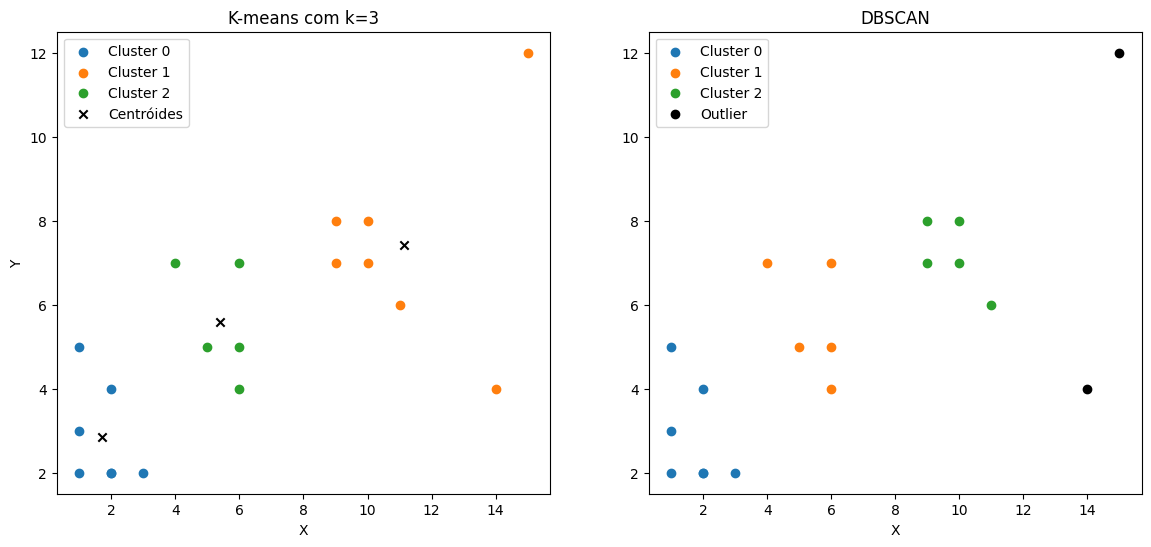

In [36]:
# Definindo pontos de dados em um espaço bidimensional
P = np.array([
    [1, 2], [1, 5], [2, 2], [2, 4], [1, 3], [2, 2],
    [3, 2], [5, 5], [6, 5], [6, 4], [6, 7], [4, 7],
    [9, 7], [9, 8], [10, 8], [10, 7], [11, 6], [15, 12], [14, 4]
])

# Aplicando K-means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(P)

# Aplicando DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2).fit(P)

# Configurando a figura e os eixos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotando K-means
for i in range(3):
    points = P[kmeans.labels_ == i]
    ax[0].scatter(points[:, 0], points[:, 1], label=f'Cluster {i}')
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', label='Centróides')
ax[0].set_title('K-means com k=3')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

# Plotando DBSCAN
labels = set(dbscan.labels_)
for label in labels:
    points = P[dbscan.labels_ == label]
    if label == -1:
        ax[1].scatter(points[:, 0], points[:, 1], c='black', label='Outlier')
    else:
        ax[1].scatter(points[:, 0], points[:, 1], label=f'Cluster {label}')
ax[1].set_title('DBSCAN')
ax[1].set_xlabel('X')
ax[1].legend()

# Adicionando legendas e mostrando o gráfico
ax[0].legend()
ax[1].legend()
plt.show()




[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


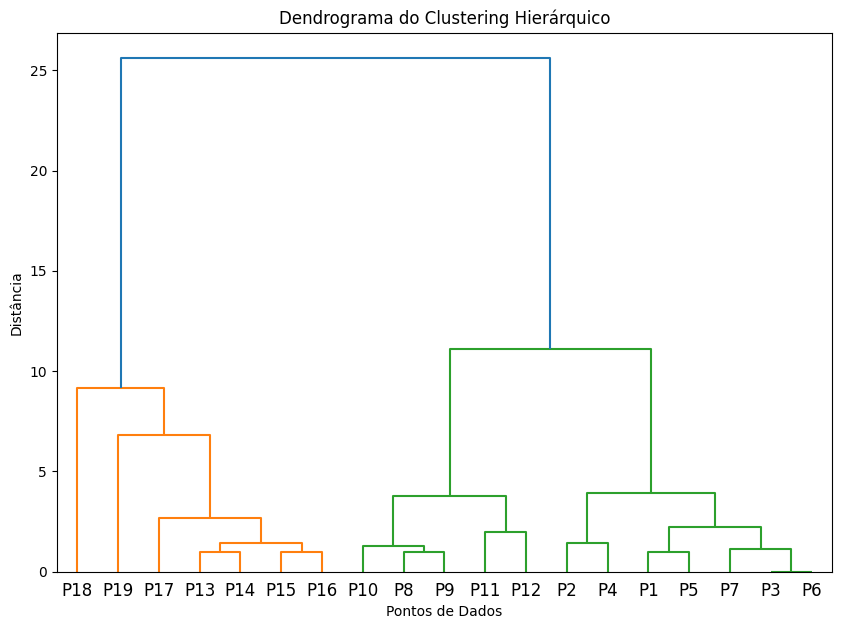

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Definindo pontos de dados em um espaço bidimensional
P = np.array([
    [1, 2], [1, 5], [2, 2], [2, 4], [1, 3], [2, 2],
    [3, 2], [5, 5], [6, 5], [6, 4], [6, 7], [4, 7],
    [9, 7], [9, 8], [10, 8], [10, 7], [11, 6], [15, 12], [14, 4]
])

# Aplicando o AgglomerativeClustering para obter os rótulos dos clusters.
# Este passo é útil para obter os rótulos
clustering = AgglomerativeClustering().fit(P)
print(clustering.labels_)

# Realizando o clustering hierárquico e criando o dendrograma
# Utiliza 'ward' como método de linkage para minimizar a variância dos clusters que estão sendo mesclados.
Z = linkage(P, 'ward')

# Visualização dos resultados como um dendrograma
plt.figure(figsize=(10, 7))
plt.title('Dendrograma do Clustering Hierárquico')
dendrogram(Z, labels=[f'P{i}' for i in range(1, len(P)+1)])
plt.xlabel('Pontos de Dados')
plt.ylabel('Distância')
plt.show()


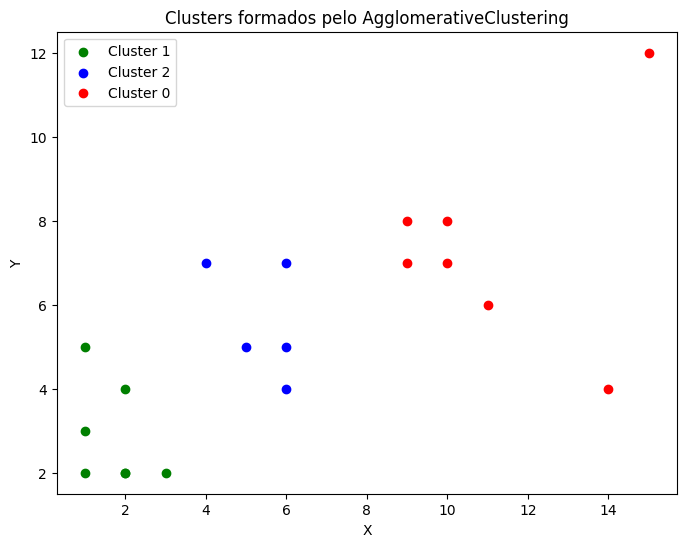

In [40]:
# Parece que houve um problema com a definição das variáveis. Vou definir tudo novamente e plotar o gráfico.
from sklearn.cluster import AgglomerativeClustering

# Aplicando o AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(P)

# Plotando os pontos com cores baseadas nos rótulos de cluster
plt.figure(figsize=(8, 6))
plt.title('Clusters formados pelo AgglomerativeClustering')
plt.xlabel('X')
plt.ylabel('Y')

colors = ['red', 'green', 'blue']  # Assumindo 3 clusters para simplificação

for i, label in enumerate(clustering.labels_):
    plt.scatter(P[i, 0], P[i, 1], color=colors[label], label=f'Cluster {label}')

# Evitando duplicação nas legendas
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())

plt.show()



# Clustering Hierárquico

O Clustering Hierárquico é uma técnica de análise de cluster que busca construir uma hierarquia de clusters. Existem dois tipos principais: aglomerativo ("de baixo para cima") e divisivo ("de cima para baixo"). O método aglomerativo começa tratando cada ponto de dados como um cluster individual e, em seguida, agrupa-os passo a passo, baseando-se na menor distância entre os clusters, até que todos os pontos sejam membros de um único cluster global.

## Algoritmo Aglomerativo

1. Inicie tratando cada ponto de dados como um cluster individual.
2. Encontre o par de clusters mais próximos com base em um critério de distância específico e combine-os em um único cluster.
3. Atualize a matriz de distância para refletir a distância entre o novo cluster e os clusters originais.
4. Repita os passos 2 e 3 até que todos os pontos de dados estejam agrupados em um único cluster.

O processo de agrupamento é frequentemente visualizado como um dendrograma, que ilustra a ordem e as distâncias (dissimilaridades) em que os clusters são combinados.

## Distância de Ward

A distância de Ward é um critério de distância usado no clustering hierárquico aglomerativo. Ela minimiza o aumento total da variação dentro do cluster a cada fusão, garantindo que os clusters formados sejam tão compactos e separados quanto possível. A distância de Ward é calculada como:

$$ \Delta \text{Var}(S_i, S_j) = \frac{|S_i| \cdot |S_j|}{|S_i| + |S_j|} \cdot ||\bar{x}_i - \bar{x}_j||^2 $$

onde:
- $ \Delta \text{Var}(S_i, S_j) $ representa o aumento da soma do erro quadrático resultante da fusão dos clusters $ S_i $ e $ S_j $.
- $ |S_i| $ e $ |S_j| $ são os tamanhos dos clusters $ S_i $ e $ S_j $, respectivamente.
- $ \bar{x}_i $ e $ \bar{x}_j $ são os centróides dos clusters $ S_i $ e $ S_j $, respectivamente.
- $ ||\bar{x}_i - \bar{x}_j||^2 $ é o quadrado da distância euclidiana entre os centróides dos dois clusters.

Essa medida é particularmente útil quando os dados formam clusters naturalmente esféricos. Ao minimizar o aumento do total da variação dentro do cluster, a distância de Ward ajuda a garantir que os clusters sejam internamente coerentes e maximamente distintos uns dos outros.


# **K-Means Clustering**

K-Means é um dos algoritmos de clusterização mais comuns e fáceis de entender. Ele classifica os dados em um número pré-definido de clusters com base na distância entre os pontos de dados.

O algoritmo K-Means segue um método simples para classificar um conjunto de dados através de um número específico de clusters (suponha k clusters). A ideia básica é definir k centroides, um para cada cluster. A próxima etapa é atribuir cada ponto de dados ao centroide mais próximo, baseando-se na distância euclidiana. Após a atribuição, o passo seguinte é atualizar o centroide de cada cluster para ser o ponto médio de todos os pontos no cluster.

### **Passos do Algoritmo K-Means**

1. **Inicialização**: Escolha `k` pontos aleatórios como centroides iniciais.
2. **Atribuição**: Atribua cada ponto de dados ao centroide mais próximo.
3. **Atualização**: Calcule os novos centroides como a média dos pontos atribuídos a cada cluster.
4. **Convergência**: Repita os passos 2 e 3 até que os centroides não mudem ou o número de iterações atinja um limite.

### **Critérios de Convergência**

O algoritmo converge quando os centroides dos novos clusters não mudam após uma iteração, ou mudam muito pouco que não faz diferença significativa.
